<a href="https://colab.research.google.com/github/Jiravatmos/Readme/blob/main/Deeplearning_MLP_inclass_tf2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 1.1 : Multilayer Perceptron (MLP)**

In [ ]:
import tensorflow as tf
tf.__version__

'2.17.0'

## **Step 1: Import library**




In [ ]:
import tensorflow as tf
tf.__version__
import numpy as np
from numpy.random import seed
#seed(42)
import tensorflow as tf


from tensorflow.keras.layers import Dense,Input, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import Model
import matplotlib.pyplot as plt

In [ ]:
nb_epochs = 35
batch_size = 32
nb_classes = 10
class_name = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck',
}


In [ ]:
cifar = tf.keras.datasets.cifar10

## **Step 2: Load data**

In [ ]:
(x_train,y_train),(x_test,y_test) = cifar.load_data()
print(x_train)

[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  70  55]
   [ 67  69

In [ ]:
(x_train,y_train),(x_test,y_test) = cifar.load_data()

y_train, y_test = y_train.reshape(y_train.shape[0]), y_test.reshape(y_test.shape[0])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
x_train.shape
# 32*32 pixel , 3สี RGB

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000,)

In [ ]:
y_test.shape

(10000,)

## **Step 3: Visualize example data**

In [ ]:
def draw_img(i):
    im = x_train[i]
    c = y_train[i]
    plt.imshow(im)
    plt.title("Class %d (%s)" % (c, class_name[c]))
    plt.axis('on')

def draw_sample(X, y, n, rows=4, cols=4, imfile=None, fontsize=12):
    for i in range(0, rows*cols):
        plt.subplot(rows, cols, i+1)
        im = X[n+i].reshape(32,32,3)
        plt.imshow(im, cmap=plt.cm.binary)
        plt.title("{}".format(class_name[y[n+i]]), fontsize=fontsize)
        plt.axis('off')
        plt.subplots_adjust(wspace=0.6, hspace=0.01)

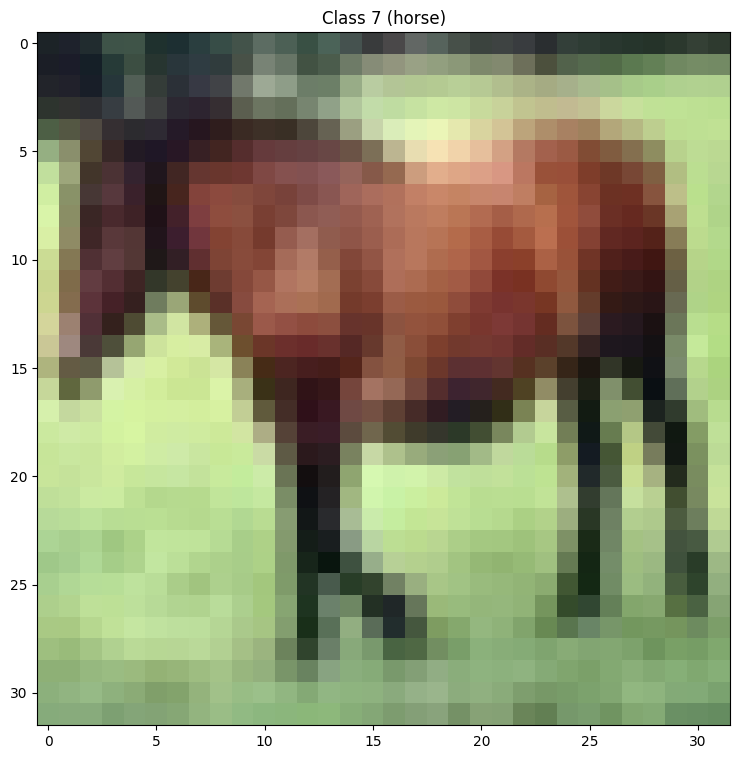

In [ ]:
draw_img(7)

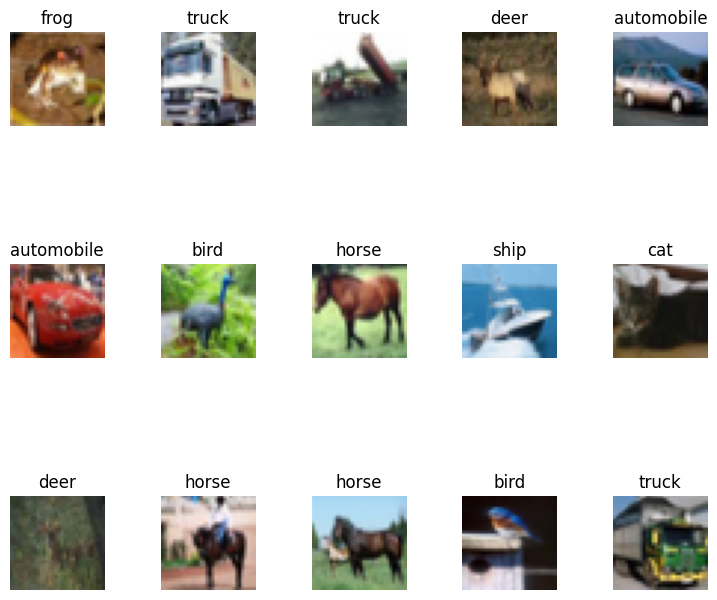

In [ ]:
draw_sample(x_train, y_train, 0, 3, 5)

## **Step 4: Create Multilayer Perceptron Model**

> Dense layers are keras alias for Fully connected layers. These layers give the ability to classify the features learned by the CNN.



Overfit

In [ ]:
# Input is 3D ขนาด32*32 มี 3 แผ่นซ้อนกัน
input = Input(shape = (32,32,3))
# Flatten คำสั่งคลี่ให้เป็น vector ยาวๆ ขนาด(n,1) columns เดียว ก็คือเวกเคอร์นั่นละ
x = Flatten()(input)
# Dense มันจะรับข้อมูลเป็น Vector เท่านั้น
x = Dense(32, activation='relu')(x)
prediction = Dense(10, activation='softmax')(x)
# softmax is function transform output to probability
model = Model(inputs = input, outputs = prediction)

## **Step 5: Loss,  Optimizer, Early stopping**

In [ ]:
early_stopping = EarlyStopping(patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,patience=2, min_lr=1e-6)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

## **Step 6: Fit model**

In [ ]:
h = model.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epochs,
    validation_data=(x_test, y_test),shuffle=True, callbacks = [early_stopping,reduce_lr])

Epoch 1/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.2127 - loss: 2.1152 - val_accuracy: 0.3068 - val_loss: 1.8745 - learning_rate: 0.0010
Epoch 2/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3021 - loss: 1.8919 - val_accuracy: 0.3146 - val_loss: 1.8613 - learning_rate: 0.0010
Epoch 3/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3189 - loss: 1.8633 - val_accuracy: 0.3210 - val_loss: 1.8331 - learning_rate: 0.0010
Epoch 4/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3308 - loss: 1.8249 - val_accuracy: 0.3362 - val_loss: 1.8012 - learning_rate: 0.0010
Epoch 5/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.3495 - loss: 1.7867 - val_accuracy: 0.3447 - val_loss: 1.7841 - learning_rate: 0.0010
Epoch 6/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.3483 - loss: 1.7930 - val_accuracy: 0.3513 - val_loss: 1.7770 - learning_rate: 0.0010
Epoch 7/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3563

## **Step 7: Plot loss and accuracy**


In [ ]:
history_dict = h.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])

Text(0, 0.5, 'Loss')

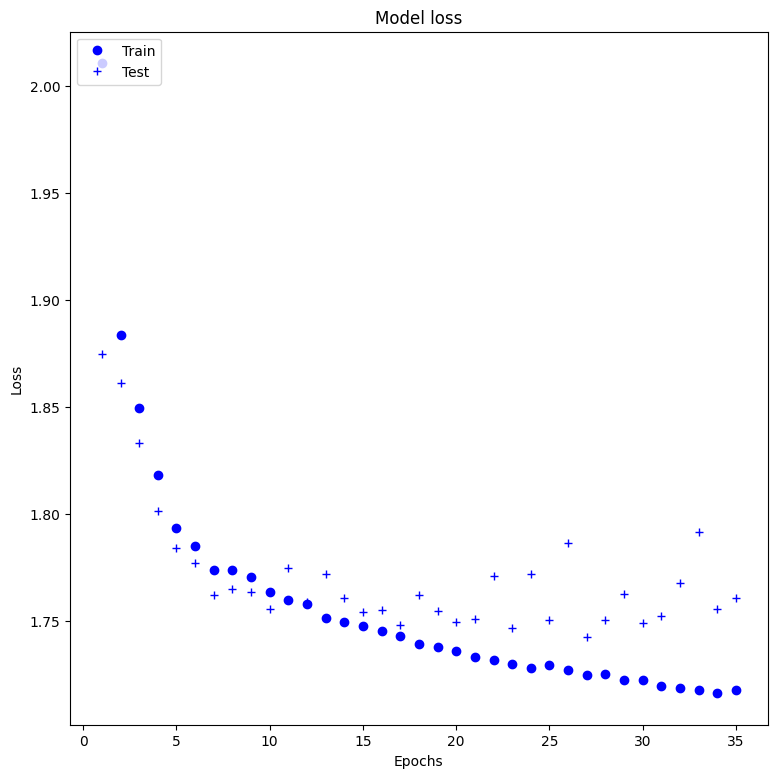

In [ ]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo')
plt.plot(epochs, val_loss_values, 'b+')
plt.title('Model loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.xlabel('Epochs')
plt.ylabel('Loss')

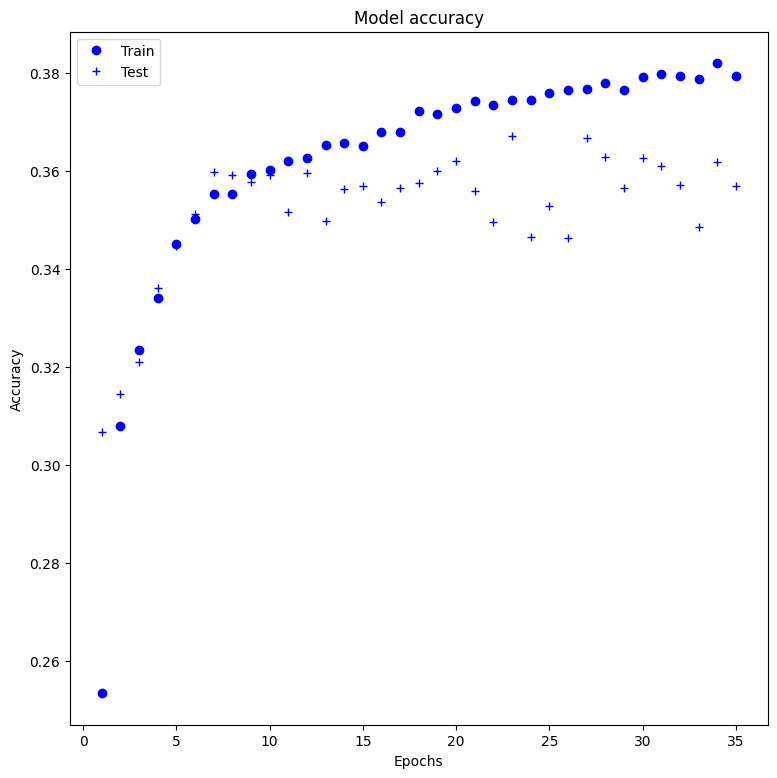

In [ ]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.title('Model accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

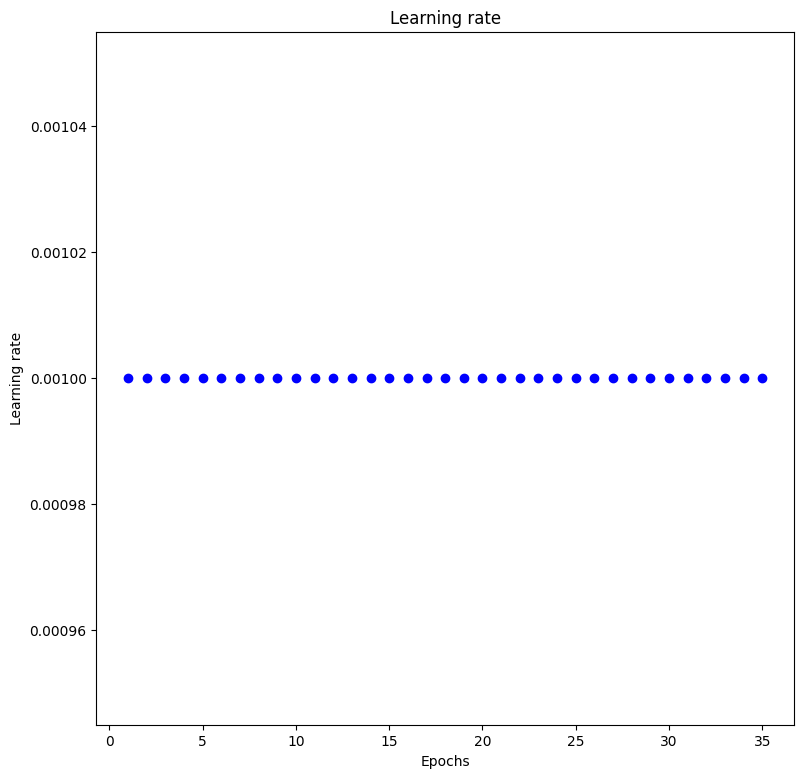

In [ ]:
lr_values = history_dict['learning_rate']

plt.plot(epochs, lr_values, 'bo')
plt.title('Learning rate')
plt.xlabel('Epochs')
plt.ylabel('Learning rate')

plt.show()

## **Step 8: Evaluate**

In [ ]:
loss, accuracy = model.evaluate(x_train,y_train, verbose=0)
print("Training: accuracy = %f  ;  loss = %f" % (accuracy, loss))

Training: accuracy = 0.381340  ;  loss = 1.713424


In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Validation: accuracy = %f  ;  loss = %f" % (accuracy, loss))

Validation: accuracy = 0.357000  ;  loss = 1.760462


## **Step 9 : Confusion matrix**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


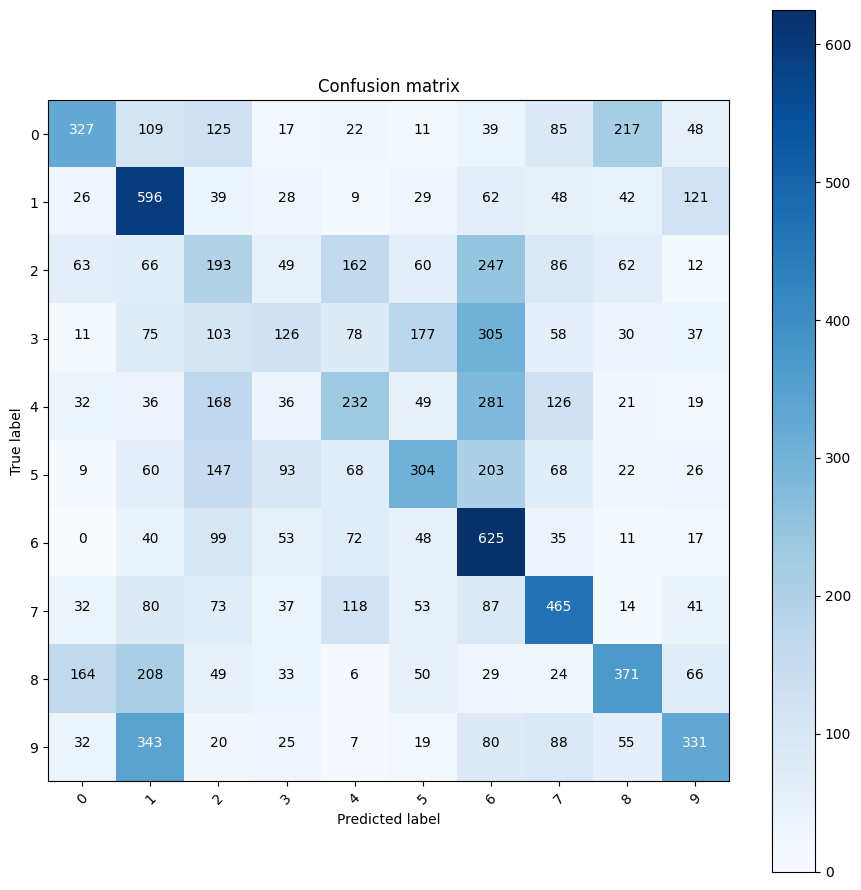

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

# **Lab 1.2 : Add Dropout**

## **Step 10 : Add Dropout**

> Dropout is the method used to reduce overfitting. It forces the model to learn multiple independent representations of the same data by randomly disabling neurons in the learning phase. In our model, dropout will randomnly disable 20% of the neurons.



In [ ]:
input = Input(shape = (32,32,3))
x = Flatten()(input)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(256, activation = 'relu')(x)
prediction = Dense(10, activation='softmax')(x)
model_2 = Model(inputs = input, outputs = prediction)

In [ ]:
early_stopping = EarlyStopping(patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,patience=2, min_lr=1e-6)
model_2.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
h_2 = model_2.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epochs,
    validation_data=(x_test, y_test),shuffle=True, callbacks = [early_stopping,reduce_lr])

Epoch 1/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.2529 - loss: 2.0711 - val_accuracy: 0.3474 - val_loss: 1.7898 - learning_rate: 0.0010
Epoch 2/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 28ms/step - accuracy: 0.3242 - loss: 1.8448 - val_accuracy: 0.3812 - val_loss: 1.7274 - learning_rate: 0.0010
Epoch 3/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 27ms/step - accuracy: 0.3545 - loss: 1.7706 - val_accuracy: 0.4048 - val_loss: 1.6801 - learning_rate: 0.0010
Epoch 4/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.3726 - loss: 1.7287 - val_accuracy: 0.3971 - val_loss: 1.6956 - learning_rate: 0.0010
Epoch 5/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.3886 - loss: 1.6855 - val_accuracy: 0.4042 - val_loss: 1.6419 - learning_rate: 0.0010
Epoch 6/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.3951 - loss: 1.6762 - val_accuracy: 0.4244 - val_loss: 1.5934 - learning_rate: 0.0010
Epoch 7/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accura

In [ ]:
model_2.save_weights('myModel_adam.weights.h5')

In [ ]:
history_dict_2 = h_2.history
history_dict_2.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])

Text(0, 0.5, 'Loss')

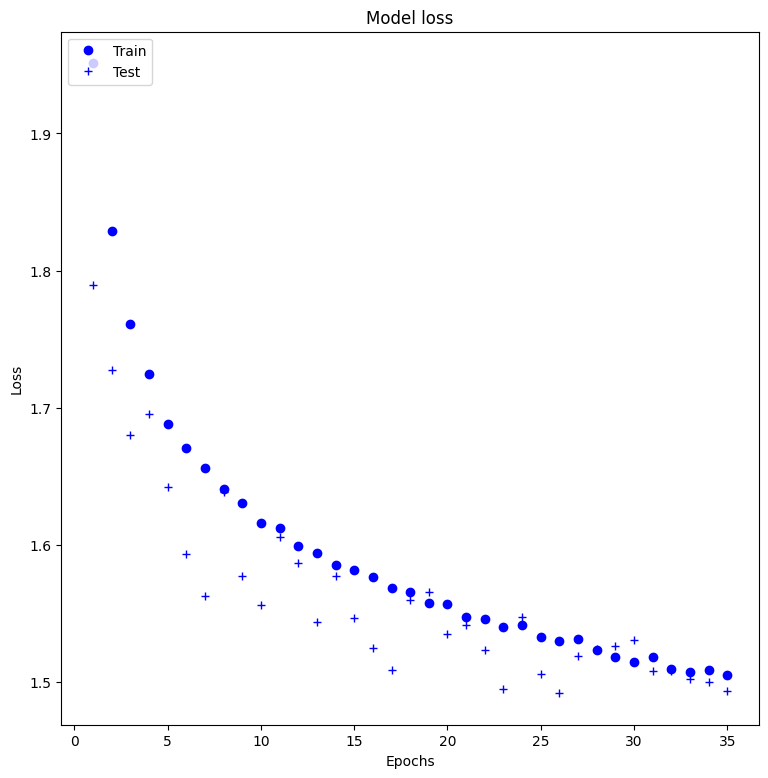

In [ ]:
loss_values = history_dict_2['loss']
val_loss_values = history_dict_2['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo')
plt.plot(epochs, val_loss_values, 'b+')
plt.title('Model loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.xlabel('Epochs')
plt.ylabel('Loss')

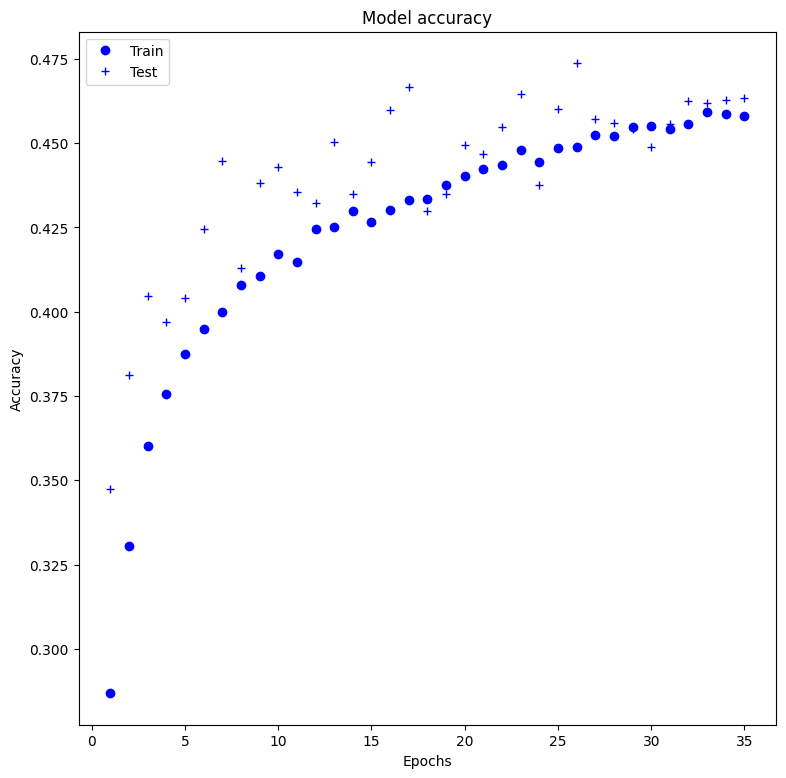

In [ ]:
acc_values = history_dict_2['accuracy']
val_acc_values = history_dict_2['val_accuracy']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.title('Model accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [ ]:
loss, accuracy = model_2.evaluate(x_train,y_train, verbose=0)
print("Training: accuracy = %f  ;  loss = %f" % (accuracy, loss))

ValueError: Input 0 of layer "functional_6" is incompatible with the layer: expected shape=(None, 32, 32, 3), found shape=(32, 28, 28)

In [ ]:
loss, accuracy = model_2.evaluate(x_test, y_test, verbose=0)
print("Validation: accuracy = %f  ;  loss = %f" % (accuracy, loss))

ValueError: Input 0 of layer "functional_6" is incompatible with the layer: expected shape=(None, 32, 32, 3), found shape=(None, 28, 28)

In [ ]:
# Predict the values from the validation dataset
Y_pred = model_2.predict(x_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

# **Step 11: Inspecting output**

In [ ]:
predicted = model_2.predict(x_test)
predicted_classes = np.argmax(predicted,axis=1)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

In [ ]:
print("Number of true predictions: ", len(correct_indices))
print("Number of false predictions:", len(incorrect_indices))

In [ ]:
plt.rcParams['figure.figsize'] = (9,9)
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct], cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(class_name[predicted_classes[correct]], class_name[y_test[correct]]))
    plt.subplots_adjust(wspace=1.2, hspace=0.01)

In [ ]:
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect], cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(class_name[predicted_classes[incorrect]], class_name[y_test[incorrect]]))
    plt.subplots_adjust(wspace=0.6, hspace=0.01)

# **Exercise**

## Mnist Data

```
The MNIST database contains 60,000 training images and 10,000 testing images taken from American Census Bureau employees and American high school students [4]. Therefore, in the second line, I have separated these two groups as train and test and also separated the labels and the images. x_train and x_test parts contain greyscale RGB codes (from 0 to 255) while y_train and y_test parts contains labels from 0 to 9 which represents which number they actually are.
![Example Mnist dataset](https://drive.google.com/open?id=1EjLwrpjtoCgo6kgdVgaMVc-ATxKnGmtn)
```



Import libraly

In [ ]:
import tensorflow as tf
tf.__version__
import numpy as np
from numpy.random import seed
#seed(42)
import tensorflow as tf


from tensorflow.keras.layers import Dense,Input, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import Model
import matplotlib.pyplot as plt

In [ ]:
nb_epochs = 300
batch_size = 32
nb_classes = 10

## Import Mnist Dataset

In [ ]:
# To do
mnist = tf.keras.datasets.mnist

In [ ]:
mnist.load_data()

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [ ]:
# size of data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
x_train = x_train.astype('float32') /255.0
x_test = x_test.astype('float32') /255.0
y_train, y_test = y_train.reshape(y_train.shape[0]), y_test.reshape(y_test.shape[0])

In [ ]:
y_train.shape

(60000,)

### **Solution**

Click below for a solution

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
y_train, y_test = y_train.reshape(y_train.shape[0]), y_test.reshape(y_test.shape[0])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Create Model MLP

In [ ]:
# To Do
# multi layer process
# 28 px * 28 px
input = Input(shape= (28,28))
x = Flatten()(input)
x = Dense(512, activation='relu')(x)
# Transform input to vector
# 10 is net dimension of output = 10 number 0-9
x = Dropout(0.35)(x)
prediction= Dense(10,activation="softmax")(x)
model = Model(inputs =input,outputs =prediction)

### **Solution**

Click below for a solution






In [ ]:
input = Input(shape = (28,28))
x = Flatten()(input)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
prediction = Dense(10, activation='softmax')(x)
model_3 = Model(inputs = input, outputs = prediction)

## Add Early stopping, Reduce learning rate and compile

In [ ]:
# To Do
early_stopping = EarlyStopping(patience=10,verbose=1)
reduce_lr = ReduceLROnPlateau(moniter='loss',factor=0.5,patience=2,min_lr=1e-6)
model.compile(optimizer="Adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

### **Solution**

Click below for a solution

In [ ]:
early_stopping = EarlyStopping(patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=10, min_lr=0.001)
model_3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

## Fit model

In [ ]:
# To Do

h = model.fit(x_train,y_train,batch_size = 28,epochs=50,
              validation_data=(x_test,y_test),shuffle=True,callbacks = [early_stopping,reduce_lr])

Epoch 1/50
2143/2143 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.8837 - loss: 0.3893 - val_accuracy: 0.9661 - val_loss: 0.1114 - learning_rate: 0.0010
Epoch 2/50
2143/2143 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.9636 - loss: 0.1216 - val_accuracy: 0.9740 - val_loss: 0.0853 - learning_rate: 0.0010
Epoch 3/50
2143/2143 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.9744 - loss: 0.0826 - val_accuracy: 0.9770 - val_loss: 0.0717 - learning_rate: 0.0010
Epoch 4/50
2143/2143 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.9783 - loss: 0.0672 - val_accuracy: 0.9790 - val_loss: 0.0669 - learning_rate: 0.0010
Epoch 5/50
2143/2143 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9821 - loss: 0.0559 - val_accuracy: 0.9791 - val_loss: 0.0714 - learning_rate: 0.0010
Epoch 6/50
2143/2143 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9830 - loss: 0.0521 - val_accuracy: 0.9821 - val_loss: 0.0598 - learning_rate: 0.0010
Epoch 7/50
2143/2143 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9

### **Solution**

Click below for a solution

In [ ]:
h_3 = model_3.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epochs,
    validation_data=(x_test, y_test),shuffle=True, callbacks = [early_stopping,reduce_lr])

Epoch 1/300
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8943 - loss: 0.3613 - val_accuracy: 0.9689 - val_loss: 0.1043 - learning_rate: 0.0010
Epoch 2/300
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9677 - loss: 0.1037 - val_accuracy: 0.9740 - val_loss: 0.0855 - learning_rate: 0.0010
Epoch 3/300
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9797 - loss: 0.0665 - val_accuracy: 0.9777 - val_loss: 0.0734 - learning_rate: 0.0010
Epoch 4/300
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9833 - loss: 0.0523 - val_accuracy: 0.9800 - val_loss: 0.0677 - learning_rate: 0.0010
Epoch 5/300
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9871 - loss: 0.0408 - val_accuracy: 0.9818 - val_loss: 0.0601 - learning_rate: 0.0010
Epoch 6/300
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9882 - loss: 0.0348 - val_accuracy: 0.9779 - val_loss: 0.0720 - learning_rate: 0.0010
Epoch 7/300
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accura

## Plot accuracy and loss

In [ ]:
history_dict_3 = h_3.history
history_dict_3.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])

In [ ]:
history_dict = h.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])

In [ ]:
history_dict

{'accuracy': [0.9280333518981934,
  0.9659333229064941,
  0.9738333225250244,
  0.9777833223342896,
  0.9811833500862122,
  0.9829833507537842,
  0.9855833053588867,
  0.9855666756629944,
  0.9916666746139526,
  0.993066668510437,
  0.9935666918754578,
  0.9936500191688538,
  0.9947166442871094,
  0.9964166879653931,
  0.9970999956130981,
  0.997866690158844,
  0.998449981212616,
  0.9984666705131531,
  0.998116672039032,
  0.9983833432197571,
  0.9988333582878113],
 'loss': [0.24072417616844177,
  0.11366739124059677,
  0.0838400200009346,
  0.06963655352592468,
  0.05820782855153084,
  0.05344363674521446,
  0.04505549743771553,
  0.042532239109277725,
  0.024365557357668877,
  0.02015652135014534,
  0.018797442317008972,
  0.017698999494314194,
  0.01482338272035122,
  0.011087007820606232,
  0.009006684646010399,
  0.006911690812557936,
  0.0057179294526577,
  0.005339927040040493,
  0.0055051520466804504,
  0.004944844637066126,
  0.004356265999376774],
 'val_accuracy': [0.9660999

Text(0, 0.5, 'Loss')

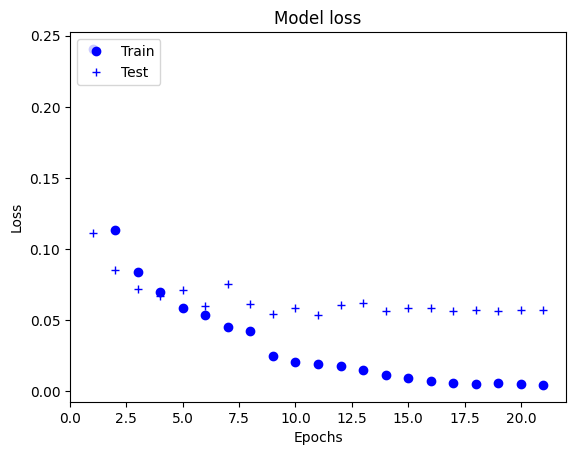

In [ ]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1) # +1 ด้วยเหตุผลของ range

plt.plot(epochs, loss_values, 'bo')
plt.plot(epochs, val_loss_values, 'b+')
plt.title('Model loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.xlabel('Epochs')
plt.ylabel('Loss')

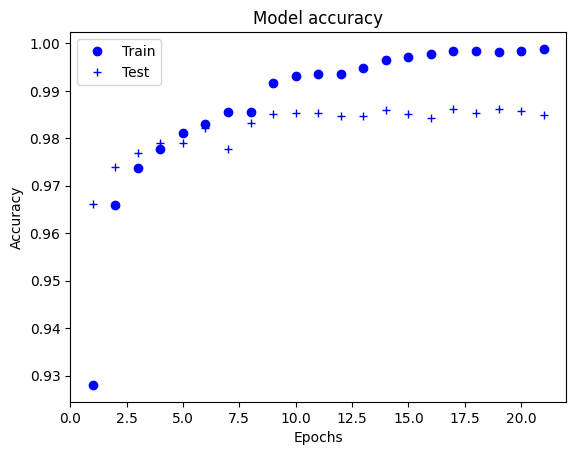

In [ ]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.title('Model accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

## Evaluate

In [ ]:
# To Do
loss, accuracy = model.evaluate(x_train,y_train, verbose=0)
print("Training: accuracy = %f  ;  loss = %f" % (accuracy, loss))

Training: accuracy = 0.999983  ;  loss = 0.000645


In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Validation: accuracy = %f  ;  loss = %f" % (accuracy, loss))

Validation: accuracy = 0.984900  ;  loss = 0.057185


### **Solution**

Click below for a solution

In [ ]:
loss, accuracy = model_3.evaluate(x_train,y_train, verbose=0)
print("Training: accuracy = %f  ;  loss = %f" % (accuracy, loss))

Training: accuracy = 0.998183  ;  loss = 0.005455


In [ ]:
loss, accuracy = model_3.evaluate(x_test, y_test, verbose=0)
print("Validation: accuracy = %f  ;  loss = %f" % (accuracy, loss))

Validation: accuracy = 0.982200  ;  loss = 0.083907

























## Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


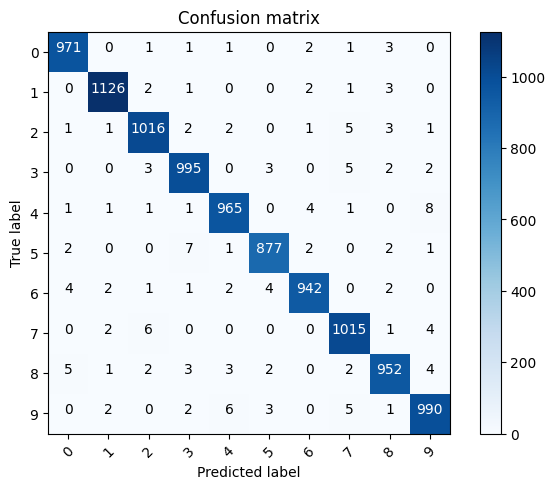

In [ ]:
from sklearn.metrics import confusion_matrix
# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))


## Inspecting output

In [ ]:
predicted = model.predict(x_test)
predicted_classes = np.argmax(predicted,axis=1)
correct_indices_2 = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices_2 = np.nonzero(predicted_classes != y_test)[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
print("Number of true predictions: ", len(correct_indices_2))
print("Number of false predictions:", len(incorrect_indices_2))

Number of true predictions:  9849
Number of false predictions: 151


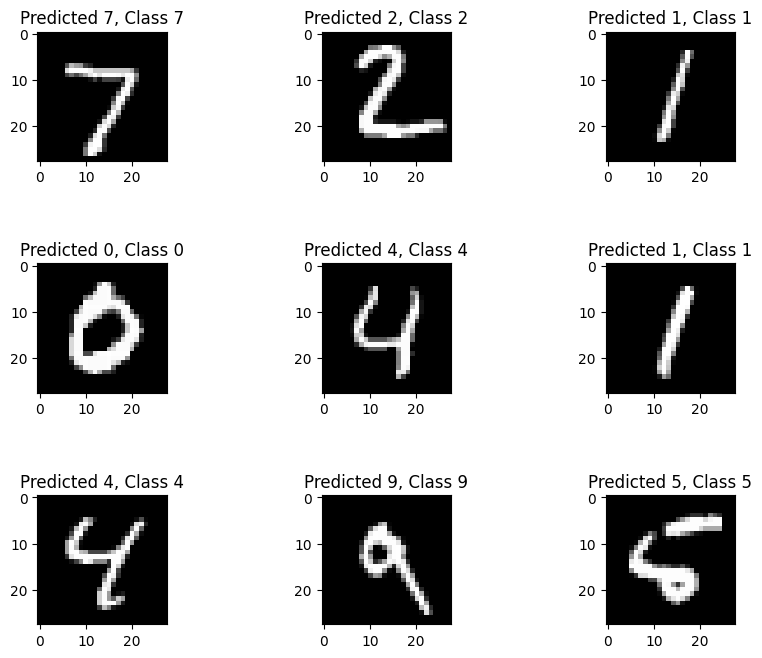

In [ ]:
plt.rcParams['figure.figsize'] = (9,9)
plt.figure()
for i, correct in enumerate(correct_indices_2[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct], cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    plt.subplots_adjust(wspace=1.2, hspace=0.01)

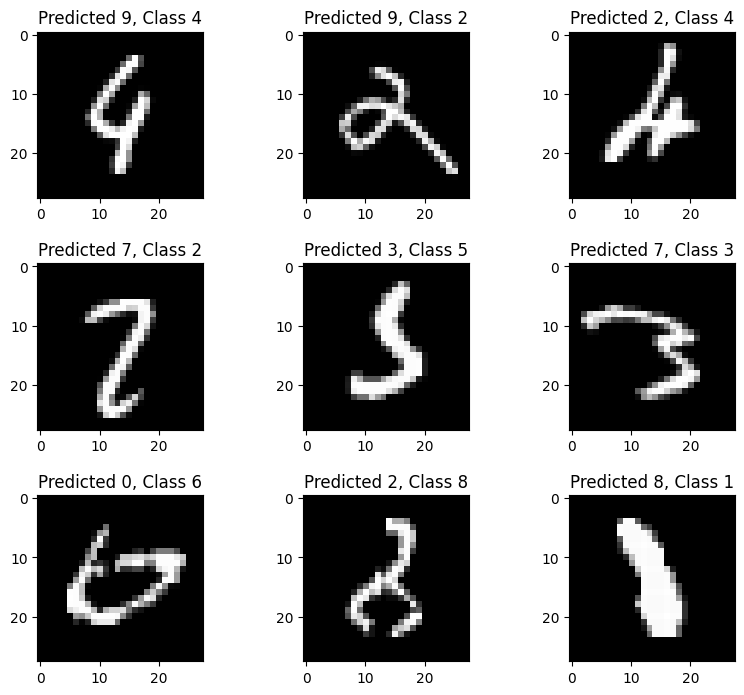

In [ ]:
plt.figure()
for i, incorrect in enumerate(incorrect_indices_2[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect], cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.subplots_adjust(wspace=0.6, hspace=0.01)